In [98]:
import numpy as np 
import pandas as pd
import os

from netCDF4 import Dataset
from wrf import (to_np, getvar, geo_bounds, smooth2d, get_cartopy, cartopy_xlim, cartopy_ylim, latlon_coords)
import cartopy.feature as cfeatures


import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [66]:
RAW_DATA_FOLDER = "../data/climatEx/raw"
RAW_WRFOUT_FILE_NAME = "wrfout_d03_1991-01-13_00_00_00"
RAW_WRFUVIC_FILE_NAME = "wrfuvic_d03_1991-01-13_00_00_00"
RESULT_FOLDER = "../reports/files"
FIGURE_FOLDER = "../reports/figures/climatEx_exploration"
os.makedirs(RESULT_FOLDER, exist_ok=True)
os.makedirs(FIGURE_FOLDER, exist_ok=True)

In [16]:
wrfout = Dataset(os.path.join(RAW_DATA_FOLDER, RAW_WRFOUT_FILE_NAME)) 
wrfuvic = Dataset(os.path.join(RAW_DATA_FOLDER, RAW_WRFUVIC_FILE_NAME))

In [17]:
# Get the Sea Level Pressure
slp = getvar(wrfout, "slp")
print(slp)

<xarray.DataArray 'slp' (south_north: 702, west_east: 558)> Size: 2MB
array([[1018.309  , 1018.30035, 1018.2879 , ...,  996.51855,  996.5054 ,
         996.4643 ],
       [1018.2588 , 1018.2466 , 1018.2329 , ...,  996.428  ,  996.4077 ,
         996.3686 ],
       [1018.21655, 1018.18823, 1018.175  , ...,  996.311  ,  996.27997,
         995.63776],
       ...,
       [ 988.09064,  988.03064,  987.9988 , ...,  990.80615,  990.53674,
         990.28644],
       [ 988.07   ,  988.06696,  988.0056 , ...,  990.80743,  990.5933 ,
         990.3487 ],
       [ 988.07666,  988.0445 ,  988.0123 , ...,  990.8482 ,  990.63385,
         990.5865 ]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 2MB -126.8 -126.7 ... -124.9
    XLAT     (south_north, west_east) float32 2MB 43.16 43.18 ... 66.56 66.57
    XTIME    float32 4B 1.93e+05
    Time     datetime64[ns] 8B 1991-01-13
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:    104
    Memo

In [ ]:
# print(type(wrfout_file))
# print(wrfout_file.data_model)
# print(wrfout_file.groups)
# print(wrfout_file.dimensions.keys())
# print(len(wrfout_file.dimensions['Time']))

# for dimobj in wrfout_file.dimensions.values():
#     print(dimobj)

# # TODO: write each variable and its description to a text file to compare with AIFS variables
# print(wrfout_file.variables.keys())
# print(wrfout_file.variables['XLAT'])

# for u,v in wrfout_file.variables.items():
#     print(type(v))

wrfout_var_df = pd.DataFrame(columns=['VAR_NAME', 'VAR_DESCR'])

for k in wrfout.variables.keys():
    # wrfout_var_df.loc[len(wrfout_var_df)] = [str(k), str(v).replace('\t', ',')]
    var = getvar(wrfout, k)
    wrfout_var_df.loc[len(wrfout_var_df)] = [str(k), var.shape]

wrfout_var_df.to_csv(os.path.join(RESULT_FOLDER, "WRFOUT_VAR_DESCR.csv"))

# with open(os.path.join(RESULT_FOLDER, "WRFOUT_VAR_DESCR.txt"), 'w') as f:
#     f.writelines([f"{k}: {v}" for k,v in wrfout_file.variables.items()])

In [92]:
df_all = pd.DataFrame(columns=['dataset', 'variable_name', 'shape'])

for k in wrfout.variables.keys():
    var = getvar(wrfout, k)
    df_all.loc[len(df_all)] = ['WRFOUT', str(k), var.shape]

for k in wrfuvic.variables.keys():
    var = getvar(wrfuvic, k)
    df_all.loc[len(df_all)] = ['WRFUVIC', str(k), var.shape]

df_all.to_csv(os.path.join(RESULT_FOLDER, "CLIMATEX_VAR_LIST.csv"))

In [ ]:
print(type(wrfuvic))
print(wrfuvic.data_model)
print(wrfuvic.groups)
print(wrfuvic.dimensions.keys())
print(len(wrfuvic.dimensions['Time']))

for dimobj in wrfuvic.dimensions.values():
    print(dimobj)

# TODO: write each variable and its description to a text file to compare with AIFS variables
print(wrfuvic.variables.keys())
print(wrfuvic.variables['XLAT'])

# for u,v in wrfuvic_file.variables.items():
#     print(v['description'])

with open(os.path.join(RESULT_FOLDER, "WRFUVIC_VAR_DESCR.txt"), 'w') as f:
    f.writelines(['\n'+f"{k}: {str(v).encode('utf-8')}" for k,v in wrfuvic.variables.items()])



<class 'netCDF4._netCDF4.Dataset'>
NETCDF3_64BIT_OFFSET
{}
dict_keys(['Time', 'DateStrLen', 'west_east', 'south_north'])
1
"<class 'netCDF4.Dimension'>" (unlimited): name = 'Time', size = 1
"<class 'netCDF4.Dimension'>": name = 'DateStrLen', size = 19
"<class 'netCDF4.Dimension'>": name = 'west_east', size = 558
"<class 'netCDF4.Dimension'>": name = 'south_north', size = 702
dict_keys(['Times', 'XLAT', 'XLONG', 'Q2', 'T2', 'PSFC', 'U10', 'V10', 'GRDFLX', 'SNOW', 'SNOWH', 'Z0', 'HGT', 'RAINC', 'RAINSH', 'RAINNC', 'I_RAINC', 'I_RAINNC', 'SNOWNC', 'GRAUPELNC', 'HAILNC', 'SWDOWN', 'SWDOWNC', 'DIFFUSE_FRAC', 'SWDDIR', 'SWDDIRC', 'SWDDNI', 'SWDDNIC', 'SWDDIF', 'ACSWUPB', 'ACSWUPBC', 'ACSWDNB', 'ACSWDNBC', 'ACLWUPB', 'ACLWUPBC', 'ACLWDNB', 'ACLWDNBC', 'I_ACSWUPB', 'I_ACSWUPBC', 'I_ACSWDNB', 'I_ACSWDNBC', 'I_ACLWUPB', 'I_ACLWUPBC', 'I_ACLWDNB', 'I_ACLWDNBC', 'SWDNT', 'SWDNTC', 'SWDNB', 'SWDNBC', 'LWDNT', 'LWDNTC', 'LWDNB', 'LWDNBC', 'ZNT', 'UST', 'RMOL', 'PBLH', 'HFX', 'QFX', 'LH', 'SNOWC', 'T

# Plot weather variables

(1, 702, 558)
(702, 558)
+proj=stere +a=6370000.0 +b=6370000.0 +nadgrids=@null +lat_0=90.0 +lon_0=-90.0 +x_0=0.0 +y_0=0.0 +lat_ts=60.0 +no_defs +type=crs
GeoBounds(CoordPair(lat=43.16402816772461, lon=-126.7738265991211), CoordPair(lat=66.57196044921875, lon=-124.92528533935547))


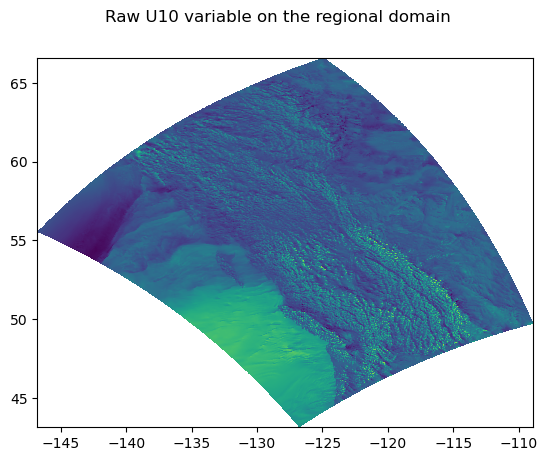

In [20]:
VAR = 'U10'

longitudes = wrfuvic.variables['XLONG'][:]
latitudes = wrfuvic.variables['XLAT'][:]
u10 = getvar(wrfuvic, 'U10')

print(longitudes.shape)
print(u10.shape)

# Get the cartopy mapping object
cart_proj = get_cartopy(u10)
print(cart_proj)

# Get lat/lon coords
lats, lons = latlon_coords(u10)

# Get the bounds for the variable
bounds = geo_bounds(u10)
print(bounds)

fig, ax = plt.subplots()
ax.pcolormesh(lons, lats, u10)
fig.suptitle(f"Raw {VAR} variable on the regional domain")
plt.show()

In [ ]:
def plot_2D_var(dataset, dataset_name, wvar, var_name, save_path: None):

    if ((wvar.shape == (50, 702, 558)) | (wvar.shape == (51, 702, 558))) & (save_path is not None):
        results_folder = os.path.join(save_path, dataset_name + '_' + var_name)
        os.makedirs(results_folder, exist_ok=True)

        for i in range(wvar.shape[0]):
            level_wvar = wvar[i,:,:]
            plot_2D_var(dataset, dataset_name, level_wvar, var_name + "_" + str(i), results_folder)
            return
        
    elif wvar.shape != (702, 558):
        print(f" ** {var_name} is of shape {wvar.shape}")
        return
    else:

        # -- get weather coordinates and projection --
        lats, lons = latlon_coords(wvar)    # get lat/lon coordinates
        cart_proj = get_cartopy(wvar)   # get the cartopy mapping object
        # print(wvar)
        # print(lats, lons)
        # print(cart_proj)
        # bounds = geo_bounds(wvar)   # get geographical bounds for the variable

        # -- download states and coastline delimitations --
        states = cfeatures.STATES.with_scale('50m')

        # -- create figure --
        fig = plt.figure(figsize=(12,6))
        ax = plt.axes(projection=cart_proj) # Set the GeoAxes to the projection used by WRF

        ax.add_feature(states, linewidth=0.5, edgecolor="blaack")
        ax.coastlines('50m', linewidth=0.5)
        ax.gridlines(color="black", linestyle="dotted")

        plt.pcolormesh(to_np(lons), to_np(lats), to_np(wvar), transform=ccrs.PlateCarree())
        plt.colorbar(ax=ax)
        fig.suptitle(f"Raw {var_name} variable on the regional domain")

        # -- output figure --
        if save_path is not None:
            plt.savefig(os.path.join(save_path, dataset_name + '_' + var_name) + ".png", bbox_inches='tight')
            plt.close('all')
        else:
            plt.show()



In [83]:
dataset_name = 'wrfout'
dataset = {'wrfout': wrfout,
                'wrfuvic': wrfuvic}.get(dataset_name)
var_name = 'U10'
var = getvar(dataset, var_name)
plot_2D_var(dataset, dataset_name, var, var_name, FIGURE_FOLDER)

/Users/Julie/opt/anaconda3/envs/wrf-env/lib/python3.11/site-packages/shapely/creation.py:730: RuntimeWarning: invalid value encountered in create_collection
  return lib.create_collection(geometries, np.intc(typ), out=out, **kwargs)
/Users/Julie/opt/anaconda3/envs/wrf-env/lib/python3.11/site-packages/shapely/creation.py:730: RuntimeWarning: invalid value encountered in create_collection
  return lib.create_collection(geometries, np.intc(typ), out=out, **kwargs)
/Users/Julie/opt/anaconda3/envs/wrf-env/lib/python3.11/site-packages/shapely/creation.py:730: RuntimeWarning: invalid value encountered in create_collection
  return lib.create_collection(geometries, np.intc(typ), out=out, **kwargs)
/Users/Julie/opt/anaconda3/envs/wrf-env/lib/python3.11/site-packages/shapely/creation.py:730: RuntimeWarning: invalid value encountered in create_collection
  return lib.create_collection(geometries, np.intc(typ), out=out, **kwargs)
/Users/Julie/opt/anaconda3/envs/wrf-env/lib/python3.11/site-packages

In [84]:
def plot_all_2D_var(dataset_name):
    dataset = {'wrfout': wrfout,
                'wrfuvic': wrfuvic}.get(dataset_name)
    
    for var_name in dataset.variables.keys():
        print(' - var_name: ', var_name)
        if var_name not in ['Times', 'ZNU', 'XLON', 'XLAT']:
            wvar = getvar(dataset, var_name)
            plot_2D_var(dataset, dataset_name, wvar, var_name, FIGURE_FOLDER)

In [ ]:
# -- plot wrfout variables --
print('WRF-OUT')
plot_all_2D_var('wrfout')

# -- plot wrfuvic variables --
print('WRF-UVIC')
plot_all_2D_var('wrfuvic')

## Plot pressure-levels wind components

In [99]:
u = getvar(wrfout, 'U')
v = getvar(wrfout, 'V')

lats, lons = latloncoords(u)


NameError: name 'latloncoords' is not defined